<a href="https://colab.research.google.com/github/LK920/tesorflow/blob/master/tf10_auto_encoder_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
날짜 : 20/08/25
"""

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

tf.__version__

'2.3.0'

In [ ]:
#MLIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

11493376/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

In [ ]:
#데이터 전처리
x_train = x_train.reshape(-1, 28 * 28) /255.0
x_test = x_test.reshape(-1, 28*28) /255.0

x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
#오토인코더 모델 구성
inputs = Input(shape=(784,))
hidden = Dense(32, activation='relu')(inputs) #inputs 매개변수 전달
outputs = Dense(784, activation='sigmoid')(hidden) #hidden과 연결(매개변수 전달받음)

auto_encoder = Model(inputs, outputs)
auto_encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#모델 설정(컴파일)/학습하기
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')
auto_encoder.fit(x_train, x_train, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0934
Epoch 2/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0933
Epoch 3/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0933
Epoch 4/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0932
Epoch 5/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0932
Epoch 6/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0931
Epoch 7/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0931
Epoch 8/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0930
Epoch 9/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0930
Epoch 10/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0930
Epoch 11/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0929
Epoch 12/20
235/235 [==============================] - 2s 9ms/step - loss: 0.0929
Epoch 13/20
235/235 [====

In [ ]:
#예측하기
result = auto_encoder.predict(x_test)
result

array([[2.09319187e-10, 1.67031888e-10, 1.05456865e-10, ...,
        3.06925665e-11, 4.02381989e-10, 1.39495429e-10],
       [2.33170818e-12, 2.12530124e-12, 6.02706416e-13, ...,
        1.34814631e-12, 1.16672340e-12, 1.49242216e-11],
       [6.13982465e-08, 1.35048651e-07, 1.08066644e-07, ...,
        1.45595237e-07, 1.62956638e-07, 1.20999928e-07],
       ...,
       [1.75048896e-14, 1.22494538e-15, 1.81999047e-15, ...,
        3.26473153e-16, 8.74258026e-15, 3.40551206e-15],
       [6.26568513e-13, 2.04990145e-13, 3.03812205e-13, ...,
        7.82728645e-14, 5.51917399e-13, 2.58542970e-12],
       [2.87359236e-19, 4.38425879e-21, 3.55958242e-20, ...,
        5.74057569e-21, 2.80733500e-20, 1.38330060e-19]], dtype=float32)

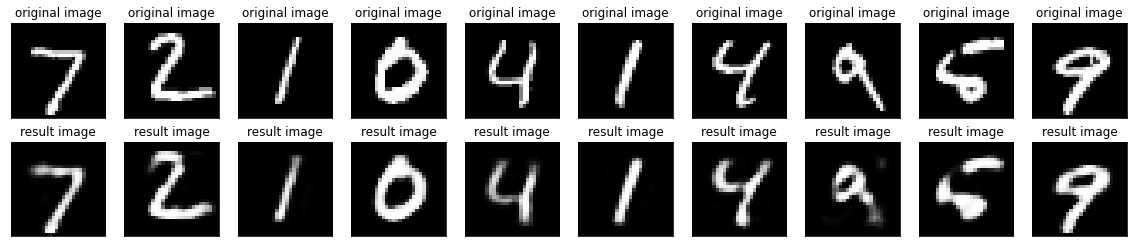

In [ ]:
#예측값 이미지 출력
plt.figure(figsize=(20,4))

for i in range(10):
  #오리지날 이미지

  ax = plt.subplot(2,10,i+1)
  ax.set_title('original image')
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #result image
  ax = plt.subplot(2,10,i+11)
  ax.set_title('result image')
  plt.imshow(result[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)